# **AP155 Lab Assignment** 
## Module 3: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 15, 15, 15, 25, and 30 points, respectively).

_Due Date_: **5PM of November 9 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Baldres, Jonabel Eleanor B. \
_Student No._: 2020-07278\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: December 1, 2022

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**  sgd. Jonabel Eleanor Baldres

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **99**/100

Score breakdown:
* Problem 1 - 15/15
* Problem 2 - 15/15
* Problem 3 - 14/15
* Problem 4 - 15/25
* Problem 5 - 30/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [304]:
#importing all the necessary packages needed for the notebook
from numpy import matmul, array, round, linspace, inf, arange, zeros, exp, log
from numpy.linalg import solve, inv, eigh
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
from math import exp
import pandas as pd

### PROBLEM 1 (15 pts.; 50/50 for code & discussion) 
**Calculate the inverse of a matrix and LU decomposition**

1. Use numpy's $\tt linalg$ package to calculate the inverse of the ff. matrix *(5 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
4 & -2 & 1 \\
3 & 6 & -4 \\
2 & 1 & 8 
\end{pmatrix} \end{equation} $

2. Check your inverse in both directions; that is, check that ${\bf AA}^{−1} = {\bf A}^{−1}{\bf A} = {\bf I}$. Up to how many number of decimal places is this true? *(5 pts.)*

3. Let this matrix $\bf A$ be used to describe three simultaneous linear equations, ${\bf Ax = b}$. Solve for the vector $\bf x$ given
${\bf b} = \begin{pmatrix} 
12 \\ 
-25 \\ 
32 
\end{pmatrix}$ using: (i) the numerical inverse calculated in (1) and (ii) LU decomposition and backsubstitution with numpy's $\tt linalg$ package. *(5 pts. each)*


In [305]:
# storing the matrices and vectors as arrays
A = array([[4,-2,1],
              [3,6,-4],
              [2,1,8]])

# given Matrix b
b = array([12,-25,32])

The module linalg is already available for solving simultaneous equations. We use its function *inv* to solve the inverse of matrix **A**.

In [306]:
A_inv = inv(A) # inverses the given matrix using the numpy's linear algebra inverse subpackage

print("The inverse of matrix A is: ")
print(A_inv) # prints the inverse of the matrix

The inverse of matrix A is: 
[[ 0.19771863  0.06463878  0.00760456]
 [-0.121673    0.11406844  0.07224335]
 [-0.03422053 -0.03041825  0.11406844]]


To prove that two matrices are inverse of one another, its product should be the **identity matrix**. 

In [307]:
AA_inv = matmul(A,A_inv) #produces the product of two arrays respectively and storing it as AA_inv 
A_invA = matmul(A_inv,A) #produces the product of two arrays respectively and storing it as A_invA
print('The product of A and A inverse is:')
print(AA_inv)
print('The product of A inverse and A is:')
print(A_invA)
print('This means that')
A_invA == AA_inv #  comparing the equality of the two variables

The product of A and A inverse is:
[[ 1.00000000e+00  6.93889390e-18  0.00000000e+00]
 [-2.77555756e-17  1.00000000e+00  5.55111512e-17]
 [ 0.00000000e+00 -5.55111512e-17  1.00000000e+00]]
The product of A inverse and A is:
[[ 1.00000000e+00 -3.46944695e-18  5.55111512e-17]
 [ 2.77555756e-17  1.00000000e+00  2.22044605e-16]
 [ 2.77555756e-17  0.00000000e+00  1.00000000e+00]]
This means that


array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

From above, we can say that the product of $\mathbf{A} \mathbf{A_{inv}} = \mathbf{A_{inv}}\mathbf{A} = \mathbf{I}$ and is true up until $10^{-18}$. This is mainly due to the rounding error innate in Python. 

We now solve for vector **x** given **b** using numerical inverse and numpy's  𝚕𝚒𝚗𝚊𝚕𝚐  package

In [308]:
x_num_inverse = matmul(A_inv,b) #using the numerical inverse calculated in (1)
x_linalg = solve(A,b) #LU decomposition and backsubstitution using numpy's  𝚕𝚒𝚗𝚊𝚕𝚐  package
print("Using the numerical inverse calculated in (1), the vector x is "+ str(x_num_inverse))
print("Using numpy's linalg package, the vector x is "+ str(x_linalg))

Using the numerical inverse calculated in (1), the vector x is [ 1. -2.  4.]
Using numpy's linalg package, the vector x is [ 1. -2.  4.]


From above, we can see that the same value for vector **x** was produced; making the two methods reliable.

### PROBLEM 2 (15 pts.; 50/50 for code & discussion)

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(10 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3 
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(5 pts.)*

In [309]:
#given matrix A is stored as an array
A = array([[8,-2,-20],
              [-2,-3,-9],
              [-20,-9,-3]])

In [310]:
eigenvalues, eigenvectors = eigh(A) # prints the eigenvalues and eigenvectors and assign them to the variables respectively
print("The eigenvalues are " + str(eigenvalues))
print("The eigenvectors are:")
print(eigenvectors)

The eigenvalues are [-21.99606195   0.16021522  23.83584674]
The eigenvectors are:
[[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]


To check our answers numerically, we see if the equation **AV = VD** holds. We do this simply by matrix multiplication of the given vectors

In [311]:
AV = matmul(A, eigenvectors) # multiply the matrix A and the eigenvectors
AV_rounded = round(AV, 5) #rounding up the variable AV to 5 decimal places
Diagonal_Matrix = array([[eigenvalues[0], 0 ,0], [0, eigenvalues[1], 0], [0,0,eigenvalues[2]]]) #the diagonal matrix with the eigenvalues as its diagonal entries
VD = matmul(eigenvectors,Diagonal_Matrix) # multiply the eigenvectors and diagonal matrix
VD_rounded = round(VD,5)  #rounding up the variable AV to 5 decimal places

In [312]:
print('AV is given by:')
print(AV_rounded)
print('VD is given by:')
print(VD_rounded)

AV is given by:
[[-11.54717   0.05895 -18.2937 ]
 [ -8.99478  -0.14417  -3.61569]
 [-16.419     0.03752  14.84638]]
VD is given by:
[[-11.54717   0.05895 -18.2937 ]
 [ -8.99478  -0.14417  -3.61569]
 [-16.419     0.03752  14.84638]]


To check if **AV = VD**

In [313]:
AV_rounded == VD_rounded #checking if AV = VD given that both are rounded into 5 decimal places 

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

From above, we can say that $\mathbf{AV} = \mathbf{VD}$. However, do note that we only limited the entries of the matrix only up to 5 decimal places. This is because we have taken into account rounding error present in the Python program. 

### PROBLEM 3 (15 pts.; 50/50 for code & discussion)

**Physics Application: Rigid body rotations with matrices**

Consider the cube in this figure:

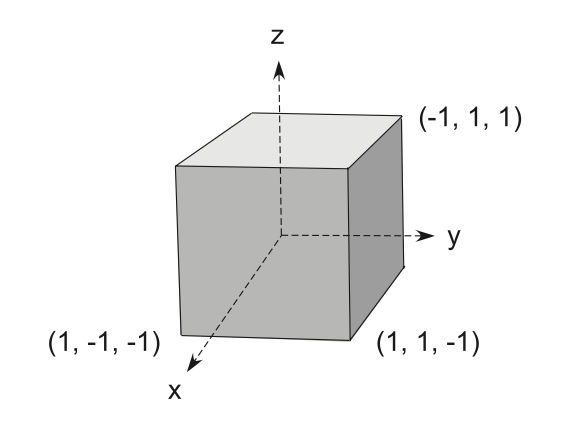

The cube has an inertia tensor for axes at the center:

$ \begin{equation} 
{\bf I} = 
\begin{pmatrix} 
2/3 & -1/4 & -1/4 \\
-1/4 & 2/3 & -1/4 \\
-1/4 & -1/4 & 2/3 
\end{pmatrix}. \end{equation} $

The cube is rotated with the three angular velocities:

$ \begin{equation} 
{\bf \omega} = 
\begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}, \ {\bf \omega} = 
\begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix} \ {\bf \omega} = 
\begin{pmatrix}
1 \\ 1 \\ 1
\end{pmatrix}
\end{equation} $

1. Compute the angular momentum vector $\bf L$ via the matrix multiplication ${\bf L} = {\bf I\omega}$ for each case. (5 pts.)

2. Make three 3-D plots for ${\bf \omega}$ and ${\bf L}$ for each case. Label and describe your plots clearly. (10 pts.)

In [314]:
#printing the value of the inertia tensor as an array
I = array([[2/3,-1/4,-1/4],
              [-1/4,2/3,-1/4],
              [-1/4, -1/4, 2/3]])

In [315]:
omega = [array([1,0,0]) , array([0,1,0]), array([1,1,1])] #storing the value of omegas (angular velocities) into a list of list
angular_momentum = [] #empty list to store the angular momentum L
for i in range(0,3):
  angular_momentum.append(matmul(I, omega[i])) #adds the product of matrix I and omega into the list angular_momentum
  print("The angular momentum when the angular velocity is " + str(omega[i]) + " is " + str(angular_momentum[i]) )


The angular momentum when the angular velocity is [1 0 0] is [ 0.66666667 -0.25       -0.25      ]
The angular momentum when the angular velocity is [0 1 0] is [-0.25        0.66666667 -0.25      ]
The angular momentum when the angular velocity is [1 1 1] is [0.16666667 0.16666667 0.16666667]


Making 3-D plots for $\omega$ and $\mathbf{L}$ for each case. 

Text(0.5, 0.92, 'Rotation 3')

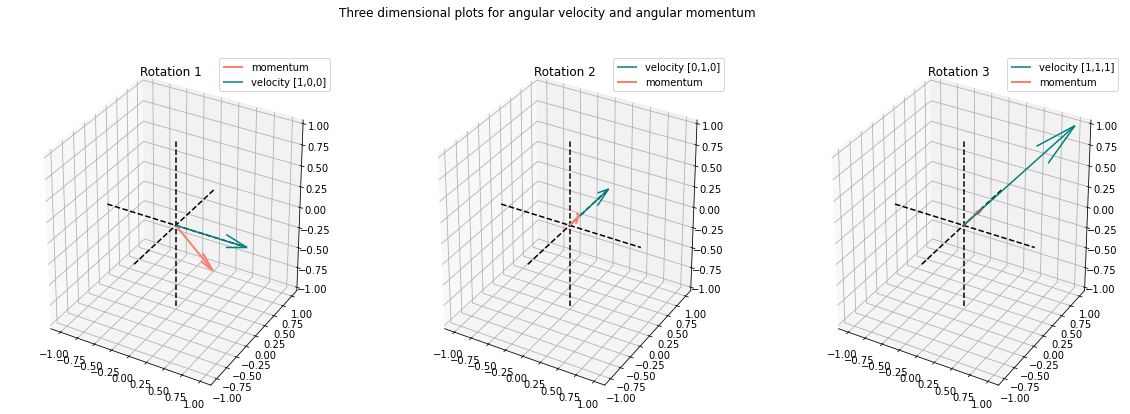

In [316]:
space = linspace(-1,1) #used for the creating of x, y, and z axes

fig = plt.figure(figsize=(20,6.5))
fig.suptitle('Three dimensional plots for angular velocity and angular momentum') 

#graph 1 where angular velocity is [1,0,0] and angular momentum is [0.67, -0.25, -0.25] 
ax = fig.add_subplot(1, 3, 1, projection='3d') #creating a 3d subplot
ax.set_xlim([-0.75,0.75],auto =True)
ax.set_ylim([-0.75,0.75],auto =True)
ax.set_zlim([-0.75,0.75],auto =True)

ax.quiver(0,0,0, angular_momentum[0][0], angular_momentum[0][1], angular_momentum[0][2], linewidth= 2, color = 'salmon', label = 'momentum') #vector for angular momentum
ax.quiver(0,0,0, omega[0][0], omega[0][1], omega[0][2], color = 'teal', label = 'velocity [1,0,0]') #vector for angular velocity
ax.legend()
ax.plot(space,space*0,space*0, linestyle = '--', color = 'black')
ax.plot(space*0,space,space*0, linestyle = '--', color = 'black')
ax.plot(space*0,space*0,space, linestyle = '--', color = 'black')
ax.set_title("Rotation 1")

#graph 2 where angular velocity is [0,1,0] and angular momentum is [-0.25, 0.67 , -0.25] 
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.set_xlim([-1,1], auto =True)
ax2.set_ylim([-1,1], auto =True)
ax2.set_zlim([-1,1], auto =True)

ax2.plot(space,space*0,space*0, linestyle = '--', color = 'black')
ax2.plot(space*0,space,space*0, linestyle = '--', color = 'black')
ax2.plot(space*0,space*0,space, linestyle = '--', color = 'black')
ax2.quiver(0,0,0, omega[1][0], omega[1][1], omega[1][2], color = 'teal', label = 'velocity [0,1,0]') #vector for angular velocity
ax2.quiver(0,0,0, angular_momentum[1][0], angular_momentum[1][1], angular_momentum[1][2], linewidth= 2, color = 'salmon', label = 'momentum') #vector for angular momentum
ax2.legend()
ax2.set_title("Rotation 2")

#graph 3 where angular velocity is [1,1,1] and angular momentum is [0.17, 0.17 , 0.17] 
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.set_xlim([-1,1], auto= True)
ax3.set_ylim([-1,1], auto= True)
ax3.set_zlim([-1,1], auto= True )
ax3.plot(space,space*0,space*0, linestyle = '--', color = 'black')
ax3.plot(space*0,space,space*0, linestyle = '--', color = 'black')
ax3.plot(space*0,space*0,space, linestyle = '--', color = 'black')
ax3.quiver(0,0,0, omega[2][0], omega[2][1], omega[2][2], color = 'teal', label = 'velocity [1,1,1]') #vector for angular velocity
ax3.quiver(0,0,0, angular_momentum[2][0], angular_momentum[2][1], angular_momentum[2][2], linewidth= 2, color = 'salmon', label = 'momentum') #vector for angular momentum
ax3.legend()
ax3.set_title("Rotation 3")

From above, the teal arrows represent the angular velocity vector and the salmon arrows represent the angular momentum vectors. 

### PROBLEM 4 (25 pts.; 50/50 for code & discussion)

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)* 

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(5 pts.)*

In [317]:
def f(c,x):
  '''defines the equation given'''
  return 1- exp(-c * x)

Relaxation method for the case **c = 2**

To use the relaxation method, we take an initial value of the unknown variable $x$, plug it on the right-hand side of the equation to get the value of the left-hand side. We do this process repeatedly until the value converges to a fixed point where it stops changing. In this problem, we repeat the process until the desired accuracy is reached.

In [318]:
x= 1.0 #initial value of x
epsilon = 10e-6 #required accuracy
c = 2  #constant
e = inf #starting point of error
while e > epsilon: #until the e > epsilon is false, the computer will continue to print the value of x
  x_old = x
  x = f(c,x)
  e = abs(x - x_old)
  print("The value of x is "  + str(x) + " with an accuracy of " + str(e))

The value of x is 0.8646647167633873 with an accuracy of 0.1353352832366127
The value of x is 0.8225966691808597 with an accuracy of 0.04206804758252758
The value of x is 0.8070247503317746 with an accuracy of 0.015571918849085153
The value of x is 0.8009201942366403 with an accuracy of 0.0061045560951342726
The value of x is 0.7984747083247583 with an accuracy of 0.002445485911881984
The value of x is 0.7974866394625985 with an accuracy of 0.0009880688621598521
The value of x is 0.797086049491047 with an accuracy of 0.00040058997155145715
The value of x is 0.796923413762181 with an accuracy of 0.00016263572886598965
The value of x is 0.7968573480008734 with an accuracy of 6.606576130763209e-05
The value of x is 0.7968305046795713 with an accuracy of 2.6843321302094658e-05
The value of x is 0.7968195968986895 with an accuracy of 1.0907780881752593e-05
The value of x is 0.7968151643557075 with an accuracy of 4.432542981991361e-06


From above, we see that when the accuracy is at $4.432542981991361e-06$, the value of x is $0.7968151643557075$

We now modify the program to calculate the solution for values of  𝑐  from 0 to 3 in steps of 0.01.

In [319]:
c_range = arange(0,3.01,0.01) #calculation of c from 0 to 3 in steps of 0.01
x_range = [] #list to store the values of x
for c in c_range: #modification
    x=1 #starting point of x
    error = inf 
    while error > epsilon: 
        x_old = x
        x = f(x,c)
        error = abs(x - x_old)
    x_range.append(x)

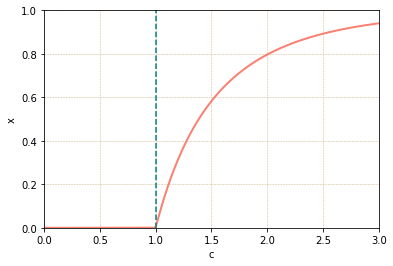

In [320]:
#making the graph of x as function of c
y= linspace(0,1)

plt.plot(c_range,x_range, color= 'salmon', linewidth = 2)
plt.plot(y * 0 + 1, y, '--', color = 'teal') 
plt.xlabel("c")
plt.xlim(0,3, auto = True)
plt.ylim(0,1,  auto = True)
plt.ylabel("x")
plt.grid(color = 'tan', linestyle = '--', linewidth = 0.5)
plt.show()

As we can see, the program find nonzero solutions only for values above c = 1. After c approaches 1, the graph shows a logarithmic increase in its trend. 

### PROBLEM 5 (30 pts.; 50/50 for code & discussion)

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two. 

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use either one of (i) Newton's method or (ii) the secant method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures. (30 pts.) 

In [321]:
#constants
G = 6.674 * (10**(-11)) 
M = 5.974 * (10**(24)) 
m = 7.348 * (10**(22)) 
R = 3.844 * (10**8)
w = 2.662 * (10 ** (-6))

We have rearranged the function given as if we are looking for its root meaning we isolate to one side all the variables provided and equate it to $0$. Furthermore, we expand the equation to clearly see that we have a five-degree polynomial equation. So, our equation is now in the form

\begin{align}
  GMR^{2} - 2GMRr + GMr^2 - Gmr^2 - R^2w^2r^3 + 2r^4w^2R - w^2r^5 = 0
  \end{align}

In [322]:
def f(r):
  '''defining the function'''
  return G*M*R**2 - 2*G*M*R*r + G*M*r**2 - G*m*r**2 - R**2*w**2*r**3 + 2 * r**4 *w**2*R - w**2*r**5

In this problem, we use the secant method to solve for the distance r from the earth to the $L_1$ point. The method is given by the equation:

\begin{align}
  x_{3} = x_2 - f(x_2) \frac{x_2 - x_{1}}{f(x_2) - f(x_{1})}
  \end{align}
where $x_1$ and $x_2$ are the starting points and $x_3$ is the new position of the root.

In [323]:
def secant_method(x1,x2):
  return x2 - (f(x2) * ((x2-x1) / (f(x2) - f(x1))))

In this problem, we continue to assign new values of $x_1$ and $x_2$ (in the form of $r_1$ and $r_2$) until we reach the value of $x_3$ (in the form of $r_3$) that satisfies the given accuracy. 

In [324]:
e = 10e-6 # accuracy
r1 = 1.0 #1st starting point 
r2 = 2.0 #2nd starting point
error = inf 
error_list= []
r_list = []

while error > e:
  r3 = secant_method(r1,r2)
  r1,r2 = r2,r3
  error = abs((r2)- (r1)) 
  error_list.append(error)
  r_list.append(r3)



From below, we can see the number of iterations done to reach the required accuracy. Starting from the 9th iteration, we can see that the value of R does not change. So we have converged with that specific value of R. 

In [325]:
df = pd.DataFrame(
    {'Value of R': r_list , 'Error Estimate': error_list})
df.index += 1
df 

,Value of R,Error Estimate
1,1.922000e+08,1.922000e+08
2,2.449586e+08,5.275857e+07
3,2.844618e+08,3.950323e+07
4,3.066885e+08,2.222674e+07
5,3.194102e+08,1.272172e+07
6,3.246718e+08,5.261517e+06
7,3.259310e+08,1.259283e+06
8,3.260430e+08,1.119388e+05
9,3.260451e+08,2.080903e+03
10,3.260451e+08,3.204933e+00


In [326]:
print(' The distance r from the Earth to the Lagrange point is ' + str(round(r3,4)))

 The distance r from the Earth to the Lagrange point is 326045071.6654
